In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from scipy import stats
import seaborn as sns

# Setting to view all columns
pd.set_option('display.max_columns', None)

# Reading in our files

In [2]:
# Importing enrollment data for mid-school year 2022/2023
enrollment = pd.read_excel("../data/MNPS_Enrollment_Data_011723.xls")

enrollment.head()

,School Year,School Level,School ID,School Name,State School ID,Zip Code,Total Enrollment,Grade PreK 3yrs,Grade PreK 4yrs,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,American Indian or Alaska Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,White,Male,Female,Economically Disadvantaged,Students with Disabilities,Limited English Proficiency,DataAsOf
0,22-23,Elementary School,496,A. Z. Kelley Elementary,1,37013,707,NaN,6%,18%,19%,20%,18%,21%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,15%,37%,27%,< 10,20%,53%,47%,33%,11%,44%,01/17/2023
1,22-23,Elementary School,375,Alex Green Elementary,5,37189,439,< 10,7%,18%,17%,13%,14%,17%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,< 10,79%,11%,< 10,10%,51%,49%,69%,11%,17%,01/17/2023
2,22-23,Elementary School,105,Amqui Elementary,10,37115,514,< 10,6%,15%,18%,19%,14%,15%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,< 10,44%,44%,< 10,11%,49%,51%,53%,10%,33%,01/17/2023
3,22-23,Elementary School,460,Andrew Jackson Elementary,15,37138,473,< 10,7%,19%,18%,13%,16%,13%,14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,< 5%,32%,15%,< 10,47%,56%,44%,22%,16%,9%,01/17/2023
4,22-23,High School,110,Antioch High School,20,37013,2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,28%,27%,27%,18%,< 10,< 5%,33%,50%,< 10,13%,52%,48%,29%,11%,37%,01/17/2023


In [3]:
# Importing letter grades assigned to schools by TN Dept. Education
grade = pd.read_excel("../data/2022-23_A-F_Letter_Grade_File.xlsx")

# Filtering for MNPS schools
grade = grade[grade['system_name']=='Metro Nashville Public Schools']

grade.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,ach_score,growth_score,growth25_score,ccr_score,ach_score_weighted,growth_score_weighted,growth25_score_weighted,ccr_score_weighted,ach_weight,growth_weight,growth25_weight,ccr_weight,lg_score,lg_grade,overall_success_rate_all_students,overall_success_rate_ed,overall_success_rate_el,overall_success_rate_swd,overall_success_rate_aian,overall_success_rate_asian,overall_success_rate_black,overall_success_rate_hispanic,overall_success_rate_nhpi,overall_success_rate_white,success_rate_g3-5_ela,success_rate_g3-5_math,success_rate_g3-5_science,success_rate_g6-8_ela,success_rate_g6-8_math,success_rate_g6-8_science,success_rate_g6-8_social_studies,success_rate_g9-12_ela,success_rate_g9-12_math,success_rate_g9-12_science,success_rate_g9-12_social_studies,growth_numeracy_score,growth_literacy_score,growth_science_score,growth_social_studies_score,growth_ela_math_score_bhn,growth_ela_math_score_ed,growth_ela_math_score_el,growth_ela_math_score_swd,growth_ela_math_score_aian,growth_ela_math_score_asian,growth_ela_math_score_black,growth_ela_math_score_hispanic,growth_ela_math_score_nhpi,growth_ela_math_score_white,growth_ela_math_score_super_subgroup,ccr_rate,ccr_act_rate,ccr_postsec_rate,ccr_ic_rate,ccr_asvab_rate,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white
267,2023,190,Metro Nashville Public Schools,1,A. Z. Kelley Elementary,0,K8,Y,N,N,2,5,3,Not a High School,1,2,0.3,Not a High School,0.5,0.4,0.1,Not a High School,3.3,C,25.2,15.9,20.2,Insufficient N Count,Insufficient N Count,32.2,24.8,14.7,Insufficient N Count,31.8,23.1,28.2,23.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,Insufficient N Count,Insufficient N Count,4,4,3,3,Insufficient N Count,3,4,3,Insufficient N Count,4,4,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
268,2023,190,Metro Nashville Public Schools,3,MNPS Virtual School,0,HS,Y,Y,Y,2.6,3,4,2,1.3,0.9,0.4,0.2,0.5,0.3,0.1,0.1,2.8,C,26.5,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,11.3,Insufficient N Count,Insufficient N Count,13,Insufficient N Count,Insufficient N Count,Insufficient N Count,24.1,13.2,18.9,31.5,55.3,11,Insufficient N Count,34,3,4,3,2,3,3,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,4,Insufficient N Count,Insufficient N Count,3,3,41.9,32.6,25.6,<5%,<5%,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count
269,2023,190,Metro Nashville Public Schools,5,Alex Green Elementary,0,K8,Y,N,N,1,3,4,Not a High School,0.5,1.2,0.4,Not a High School,0.5,0.4,0.1,Not a High School,2.1,D,12.6,9.2,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,12.5,Insufficient N Count,Insufficient N Count,Insufficient N Count,10.1,15.6,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,3,Insufficient N Count,3,3,4,3,Insufficient N Count,Insufficient N Count,2,4,Insufficient N Count,Insufficient N Count,3,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
270,2023,190,Metro Nashville Public Schools,10,Amqui Elementary,0,K8,Y,N,N,1,4,3,Not a High School,0.5,1.6,0.3,Not a High School,0.5,0.4,0.1,Not a High School,2.4,D,18.9,12.2,17.3,6.5,Insufficient N Count,Insufficient N Count,13.4,19.5,Insufficient N Count,Insufficient N Count,16.6,20.3,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,Insufficient N Count,3,

In [4]:
# Importing staff ratios from TN Dept. Education
staff = pd.read_excel("../data/staff-2022-23-final.xlsx")

# Filtering for MNPS schools
staff = staff[staff['System Name']=='Metro Nashville Public Schools']
staff = staff[staff['Staff Type']=='Teacher']

staff.head()

,Year,System Number,System Name,School Number,School Name,Staff Type,Educator Count,Student-Educator Ratio
837,2022-2023,190,Metro Nashville Public Schools,0,All Schools,Teacher,5685,14
840,2022-2023,190,Metro Nashville Public Schools,1,A. Z. Kelley Elementary,Teacher,54,12
843,2022-2023,190,Metro Nashville Public Schools,3,MNPS Virtual School,Teacher,13,15
845,2022-2023,190,Metro Nashville Public Schools,5,Alex Green Elementary,Teacher,32,12
848,2022-2023,190,Metro Nashville Public Schools,10,Amqui Elementary,Teacher,42,11


In [5]:
# Importing teacher experience data from TN Dept. Education
xp = pd.read_excel("../data/EducatorExperienceandLicensureData2023.xlsx", sheet_name='School Data 2022-23')

# Filtering for MNPS schools
xp = xp[xp['DistrictName']=='Davidson County']
xp = xp[xp['Category']=='Experienced Teachers']

xp.head()

,DistrictNumber,DistrictName,SchoolNumber,SchoolName,Category,Number,Percentage
1773,190,Davidson County,1,A. Z. Kelley Elementary,Experienced Teachers,48,88.89%
1780,190,Davidson County,3,MNPS Virtual School,Experienced Teachers,13,100.00%
1787,190,Davidson County,5,Alex Green Elementary,Experienced Teachers,27,84.38%
1794,190,Davidson County,10,Amqui Elementary,Experienced Teachers,28,66.67%
1801,190,Davidson County,15,Andrew Jackson Elementary,Experienced Teachers,37,97.37%


In [6]:
# Importing per pupil expenditures from TN Dept. Education
expenditures = pd.read_excel("../data/per-pupil-expenditures-fy22.xlsx")

# Filtering for MNPS schools
expenditures = expenditures[expenditures['District Name']=='Davidson County']

expenditures.head()

,Key,Dist,District ID,District Name,School ID,School Name,Enrollment,Federal Per Pupil,State and Local Per Pupil,Total Per Pupil,School Level Federal Per Pupil Expenditures,School Level State and Local Per Pupil Expenditures,School Level School Nutrition Per Pupil Expenditures,Total School Level Per Pupil Expenditures,Distrist Level Federal Per Pupil Expenditures,District Level State and Local Per Pupil Expenditures,District Level School Nutrition Per Pupil Expenditures,Total District Level Per Pupil Expenditures,Total School Per Pupil Expenditures,Total Expenditures Per School,Local Percentage,Federal Percentage,State Percentage,Unnamed: 23,Total Federal Salaries & Benefits,Federal Salaries & Benefits Per Pupil,Total Federal Non-personnel,Federal Non-personnel Per Pupil,Total State/Local Salaries & Benefits,State/Local Salaries & benefits Per Pupil,Total State/Local Non-personnel,State/Local Non-personnel Per Pupil
34,190 9999,190.0,190.0,Davidson County,9999.0,District Average/Total,77109.0,2629.86,13303.59,15933.45,998.89,8623.38,629.86,10252.13,876.12,4680.21,124.99,5681.32,15933.45,15933.45,0.149529,0.264986,0.585485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,190 0001,190.0,190.0,Davidson County,1.0,A. Z. Kelley Elementary,702.0,2209.14,13279.31,15488.45,422.68,8599.10,785.35,9807.14,876.12,4680.21,124.99,5681.32,15488.46,10872898.92,NaN,NaN,NaN,NaN,266515,379.650997,30209.0,43.032764,5836849.0,8314.599715,199720.0,284.501425
391,190 0003,190.0,190.0,Davidson County,3.0,MNPS Virtual School,290.0,7312.89,8501.01,15813.90,6311.78,3820.80,0.00,10132.58,876.12,4680.21,124.99,5681.32,15813.90,4586031.00,NaN,NaN,NaN,NaN,1723345,5942.568966,107071.0,369.210345,1053336.0,3632.193103,54697.0,188.610345
392,190 0005,190.0,190.0,Davidson County,5.0,Alex Green Elementary,353.0,3115.04,14579.13,17694.17,781.97,9898.92,1331.96,12012.85,876.12,4680.21,124.99,5681.32,17694.17,6246042.01,NaN,NaN,NaN,NaN,248522,704.028329,15792.0,44.736544,3343696.0,9472.226629,150621.0,426.688385
393,190 0010,190.0,190.0,Davidson County,10.0,Amqui Elementary,397.0,3442.01,14136.63,17578.64,1252.16,9456.42,1188.74,11897.32,876.12,4680.21,124.99,5681.32,17578.64,6978720.08,NaN,NaN,NaN,NaN,457899,1153.397985,15568.0,39.214106,3596510.0,9059.219144,157690.0,397.204030


# Cleaning

In [7]:
# Cleaning race columns ('American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'White')

# Defining a custom function to clean and convert race values
def clean_machine(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('%'):
            value = value.rstrip('%')
        if value.startswith('<'):
            return None
        try:
            return float(value) / 100
        except ValueError:
            return np.nan
    return np.nan

# Defining the race columns to be cleaned and running them through clean_machine
race_columns = ['American Indian or Alaska Native', 'Asian', 'Black or African American',
    'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'White']

for col in race_columns:
    enrollment[col] = enrollment[col].apply(clean_machine)

# Estimating '<10%' and '<5%' by distributing the remaining percent amongst the estimated/low percent columns
def distributing_percentages(row):
    known_percent = row[race_columns].dropna().sum()
    remaining_percent = 1 - known_percent
    unknown_columns = row[race_columns].isna()
    num_unknowns = unknown_columns.sum()
    
    if num_unknowns > 0:
        distributed_percent = remaining_percent / num_unknowns
        row[race_columns] = row[race_columns].fillna(distributed_percent)
    return row

enrollment = enrollment.apply(distributing_percentages, axis=1)

In [8]:
# Cleaning gender columns ('Male' and 'Female')

# Defining the gender columns to be cleaned and running them through clean_machine
gender_columns = ['Male', 'Female']

for col in gender_columns:
    enrollment[col] = enrollment[col].apply(clean_machine)

# Estimate '<10%' by using the known gender percent
def estimate_gender_percentages(row):
    known_percent = row[gender_columns].dropna().sum()
    remaining_percent = 1 - known_percent
    unknown_columns = row[gender_columns].isna()
    num_unknowns = unknown_columns.sum()
    
    if num_unknowns > 0:
        distributed_percent = remaining_percent / num_unknowns
        row[gender_columns] = row[gender_columns].fillna(distributed_percent)
    return row

enrollment = enrollment.apply(estimate_gender_percentages, axis=1)

In [9]:
# Cleaning the additional demographic columns ('Economically Disadvantaged', 'Students with Disabilities', 'Limited English Proficiency')

# Defining the demographic columns to be cleaned
demographic_columns = [
    'Economically Disadvantaged', 'Students with Disabilities', 'Limited English Proficiency'
]

# Updating the cleaning function to handle specific cases for demographic columns
def clean_machine_2(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('%'):
            value = value.rstrip('%')
        if value.startswith('<'):
            if '5' in value:
                return 0.025
            elif '10' in value:
                return 0.075
        elif value.startswith('>'):
            if '95' in value:
                return 0.975
        try:
            return float(value) / 100
        except ValueError:
            return np.nan
    return np.nan

# Running the demographic columns through clean_machine_2
for col in demographic_columns:
    enrollment[col] = enrollment[col].apply(clean_machine_2)

In [10]:
# Filtering out specialty and non-traditional schools
enrollment = enrollment[~enrollment['School Level'].isin(['Non-Traditional - Hybrid', 'Non-Traditional', 'Adult', 'Alternative Learning Center', 'Special Education'])]

# Columns that represent grades from 'Grade K' to 'Grade 12'
grades = ['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

# Filtering out preschools
enrollment = enrollment[enrollment[grades].notna().any(axis=1)]

# What is the demographic composition (e.g., race, ethnicity, socioeconomic status) of students within Metro Nashville Public Schools?

In [11]:
# Racial demographics

# Number of students of each race per school
for col in race_columns:
    enrollment[col + ' Count'] = enrollment[col] * enrollment['Total Enrollment']

# Getting the counts across all schools
total_counts = enrollment[[col + ' Count' for col in race_columns]].sum()

# Total district enrollment
total_enrollment = enrollment['Total Enrollment'].sum()

# Overall percent of students by race
overall_percentages = (total_counts / total_enrollment) * 100

# Results
print("MNPS Percentages of Students by Race:")
print(overall_percentages)

MNPS Percentages of Students by Race:
American Indian or Alaska Native Count              0.684774
Asian Count                                         3.233362
Black or African American Count                    38.859279
Hispanic/Latino Count                              32.438137
Native Hawaiian or Other Pacific Islander Count     0.684774
White Count                                        24.099674
dtype: float64


In [12]:
# Gender demographics

# Calculate the number of students of each gender per school
for col in gender_columns:
    enrollment[col + ' Count'] = enrollment[col] * enrollment['Total Enrollment']

# Getting the counts across all schools
total_gender_counts = enrollment[[col + ' Count' for col in gender_columns]].sum()

# Total district enrollment
total_enrollment = enrollment['Total Enrollment'].sum()

# Overall percent of students by gender
overall_gender_percentages = (total_gender_counts / total_enrollment) * 100

# Results
print("MNPS Percentages of Students by Gender:")
print(overall_gender_percentages)

MNPS Percentages of Students by Gender:
Male Count      51.253542
Female Count    48.751500
dtype: float64


In [13]:
# Additional demographics

# Number of students of each demographic per school
for col in demographic_columns:
    enrollment[col + ' Count'] = enrollment[col] * enrollment['Total Enrollment']

# Getting the counts across all schools
total_demographic_counts = enrollment[[col + ' Count' for col in demographic_columns]].sum()

# Overall percent of students by demographic
overall_demographic_percentages = (total_demographic_counts / total_enrollment) * 100

# Print the results for demographic columns
print("MNPS Percentages of Students in Demographic Categories:")
print(overall_demographic_percentages)

MNPS Percentages of Students in Demographic Categories:
Economically Disadvantaged Count     35.687223
Students with Disabilities Count     12.287896
Limited English Proficiency Count    27.943493
dtype: float64


# Are there disparities in academic performance between students from different racial, ethnic, or socioeconomic backgrounds?

In [14]:
grade['ach_score'] = pd.to_numeric(grade['ach_score'], errors='coerce')
grade['lg_score'] = pd.to_numeric(grade['lg_score'], errors='coerce')

In [15]:
# Merging enrollment and grade, to assign a grade to each school
enrollment_and_academic = pd.merge(enrollment, grade[['school', 'ach_score', 'lg_score', 'lg_grade']], left_on='State School ID', right_on='school', how='left')

# Dropping 'school' column
enrollment_and_academic = enrollment_and_academic.drop(columns=['school'])

enrollment_and_academic.head()

,School Year,School Level,School ID,School Name,State School ID,Zip Code,Total Enrollment,Grade PreK 3yrs,Grade PreK 4yrs,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,American Indian or Alaska Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,White,Male,Female,Economically Disadvantaged,Students with Disabilities,Limited English Proficiency,DataAsOf,American Indian or Alaska Native Count,Asian Count,Black or African American Count,Hispanic/Latino Count,Native Hawaiian or Other Pacific Islander Count,White Count,Male Count,Female Count,Economically Disadvantaged Count,Students with Disabilities Count,Limited English Proficiency Count,ach_score,lg_score,lg_grade
0,22-23,Elementary School,496,A. Z. Kelley Elementary,1,37013,707,NaN,6%,18%,19%,20%,18%,21%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,0.150000,0.37,0.27,0.005000,0.20,0.53,0.47,0.33,0.11,0.44,01/17/2023,3.535000,106.050000,261.59,190.89,3.535000,141.40,374.71,332.29,233.31,77.77,311.08,2.0,3.3,C
1,22-23,Elementary School,375,Alex Green Elementary,5,37189,439,< 10,7%,18%,17%,13%,14%,17%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.79,0.11,0.000000,0.10,0.51,0.49,0.69,0.11,0.17,01/17/2023,0.000000,0.000000,346.81,48.29,0.000000,43.90,223.89,215.11,302.91,48.29,74.63,1.0,2.1,D
2,22-23,Elementary School,105,Amqui Elementary,10,37115,514,< 10,6%,15%,18%,19%,14%,15%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003333,0.003333,0.44,0.44,0.003333,0.11,0.49,0.51,0.53,0.10,0.33,01/17/2023,1.713333,1.713333,226.16,226.16,1.713333,56.54,251.86,262.14,272.42,51.40,169.62,1.0,2.4,D
3,22-23,Elementary School,460,Andrew Jackson Elementary,15,37138,473,< 10,7%,19%,18%,13%,16%,13%,14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.020000,0.32,0.15,0.020000,0.47,0.56,0.44,0.22,0.16,0.09,01/17/2023,9.460000,9.460000,151.36,70.95,9.460000,222.31,264.88,208.12,104.06,75.68,42.57,4.0,3.5,B
4,22-23,High School,110,Antioch High School,20,37013,2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,28%,27%,27%,18%,0.013333,0.013333,0.33,0.50,0.013333,0.13,0.52,0.48,0.29,0.11,0.37,01/17/2023,28.386667,28.386667,702.57,1064.50,28.386667,276.77,1107.08,1021.92,617.41,234.19,787.73,1.0,1.1,F


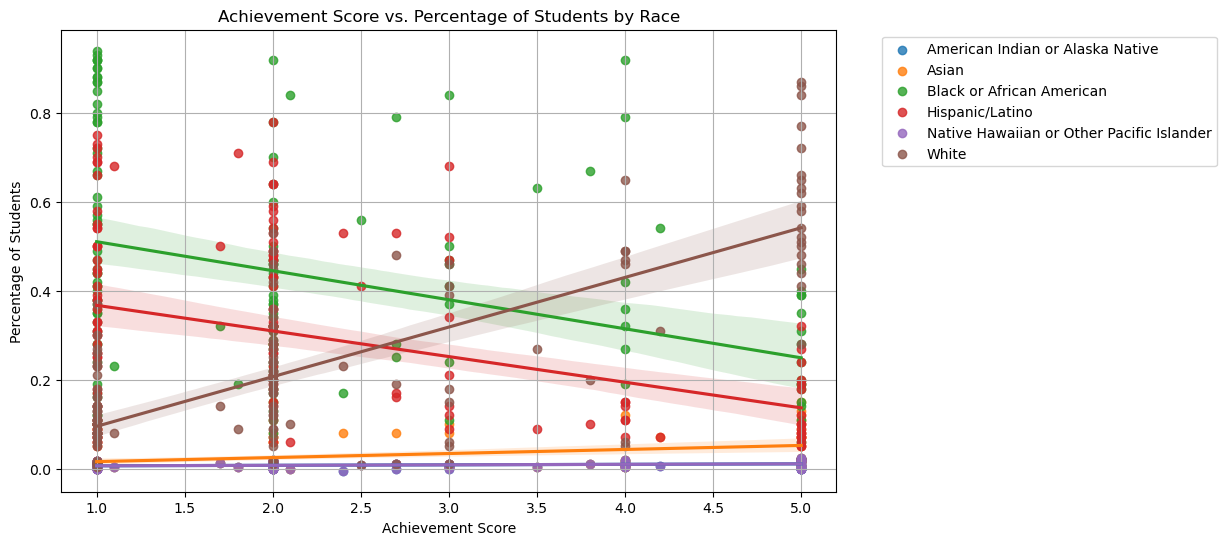

In [16]:
# Scatterplot showing % racial groups vs. school's achievement score

# Selecting columns
racial_groups = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 
                 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'White']

columns = racial_groups + ['ach_score']

# Dropping rows with missing values
selected = enrollment_and_academic[columns].dropna()

# Scatterplot with separate trendlines for each race
plt.figure(figsize=(10, 6))
for race in racial_groups:
    sns.regplot(data=selected, x='ach_score', y=race, label=race) # add scatter=False to show only trendlines
    
plt.xlabel('Achievement Score')
plt.ylabel('Percentage of Students')
plt.title('Achievement Score vs. Percentage of Students by Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

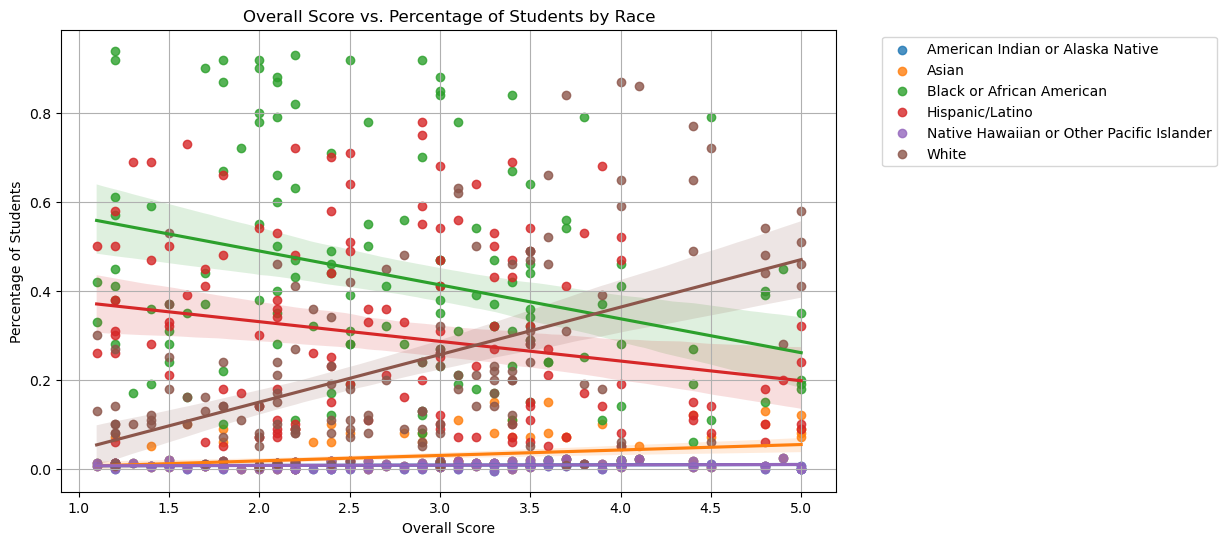

In [17]:
# Scatterplot showing % racial groups vs. school's overall score

# Selecting columns
racial_groups = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 
                 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'White']

columns = racial_groups + ['lg_score']

# Dropping rows with missing values
selected = enrollment_and_academic[columns].dropna()

# Scatterplot with separate trendlines for each race
plt.figure(figsize=(10, 6))
for race in racial_groups:
    sns.regplot(data=selected, x='lg_score', y=race, label=race) # add scatter=False to show only trendlines
    
plt.xlabel('Overall Score')
plt.ylabel('Percentage of Students')
plt.title('Overall Score vs. Percentage of Students by Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [18]:
# Correlation, scores and race

for race in racial_groups:
    enrollment_and_academic[race] = pd.to_numeric(enrollment_and_academic[race], errors='coerce')

# Select columns for correlation analysis
columns_of_interest = racial_groups + ['ach_score', 'lg_score']

# Calculate correlation matrix
correlation_matrix = enrollment_and_academic[columns_of_interest].corr()

# Extract correlations of races with ach_score and lg_score
race_correlations = correlation_matrix.loc[racial_groups, ['ach_score', 'lg_score']]

# Print correlation matrix
print("Correlation between races and ach_score and lg_score:")
print(race_correlations)

Correlation between races and ach_score and lg_score:
                                           ach_score  lg_score
American Indian or Alaska Native            0.257809  0.119215
Asian                                       0.354947  0.343664
Black or African American                  -0.366858 -0.307527
Hispanic/Latino                            -0.380050 -0.209458
Native Hawaiian or Other Pacific Islander   0.257809  0.119215
White                                       0.759745  0.521812


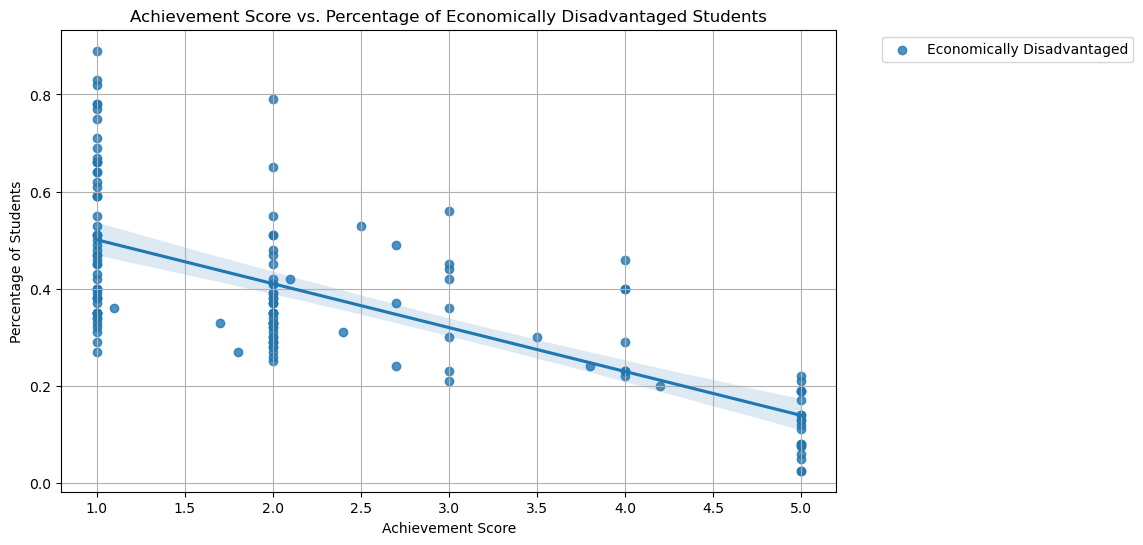

In [19]:
# Scatterplot of Economically Disadvantaged and Achievement Score

# Dropping rows with missing values
selected = enrollment_and_academic[['ach_score', 'Economically Disadvantaged']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='ach_score', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
plt.xlabel('Achievement Score')
plt.ylabel('Percentage of Students')
plt.title('Achievement Score vs. Percentage of Economically Disadvantaged Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

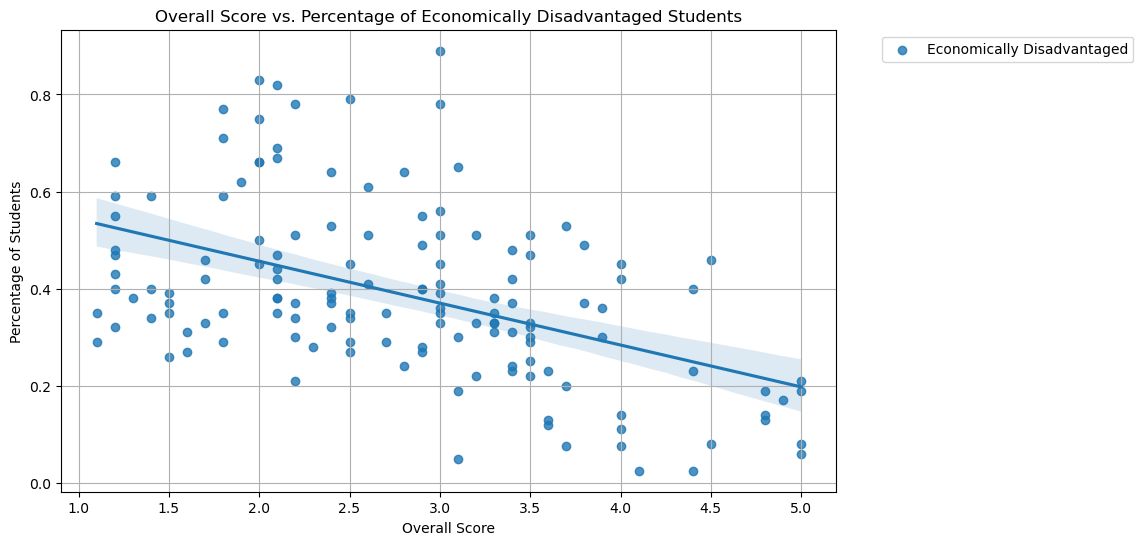

In [20]:
# Scatterplot of Economically Disadvantaged and Overall Score

# Dropping rows with missing values
selected = enrollment_and_academic[['lg_score', 'Economically Disadvantaged']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='lg_score', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
plt.xlabel('Overall Score')
plt.ylabel('Percentage of Students')
plt.title('Overall Score vs. Percentage of Economically Disadvantaged Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [21]:
# Correlation, scores and $

# Select columns for correlation analysis
columns_of_interest = ['Economically Disadvantaged'] + ['ach_score', 'lg_score']

# Calculate correlation matrix
correlation_matrix = enrollment_and_academic[columns_of_interest].corr()

# Extract correlations of races with ach_score and lg_score
econ_correlations = correlation_matrix.loc['Economically Disadvantaged', ['ach_score', 'lg_score']]

# Print correlation matrix
print("Correlation between percent economically disadvantaged and ach_score and lg_score:")
print(econ_correlations)

Correlation between percent economically disadvantaged and ach_score and lg_score:
ach_score   -0.701005
lg_score    -0.479742
Name: Economically Disadvantaged, dtype: float64


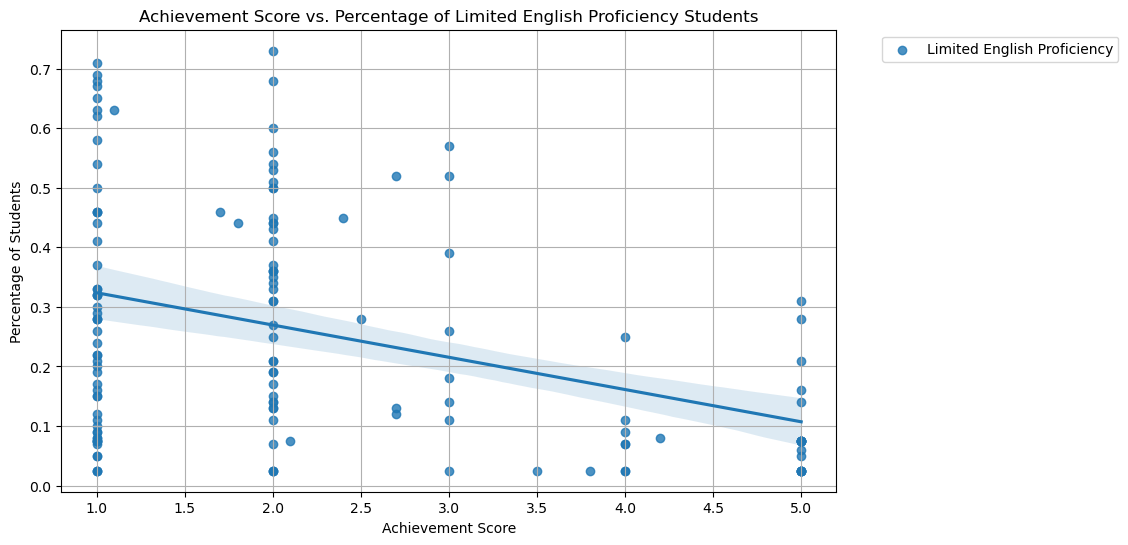

In [22]:
# Scatterplot of Limited English Proficiency and Achievement Score

# Dropping rows with missing values
selected = enrollment_and_academic[['ach_score', 'Limited English Proficiency']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='ach_score', y='Limited English Proficiency', label='Limited English Proficiency') # add scatter=False to show only trendlines
    
plt.xlabel('Achievement Score')
plt.ylabel('Percentage of Students')
plt.title('Achievement Score vs. Percentage of Limited English Proficiency Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

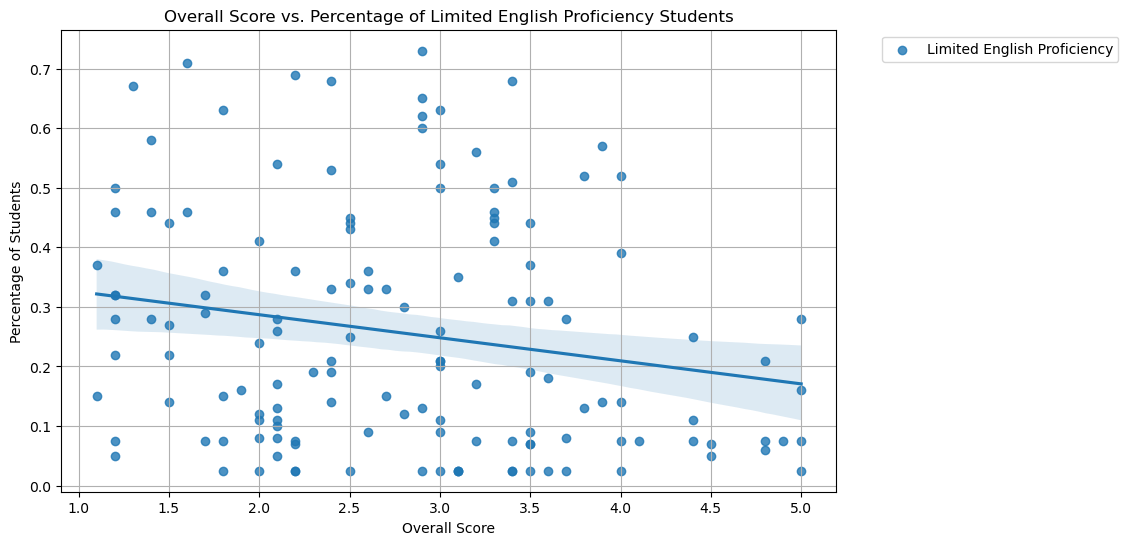

In [23]:
# Scatterplot of Limited English Proficiency and Overall Score

# Dropping rows with missing values
selected = enrollment_and_academic[['lg_score', 'Limited English Proficiency']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='lg_score', y='Limited English Proficiency', label='Limited English Proficiency') # add scatter=False to show only trendlines
    
plt.xlabel('Overall Score')
plt.ylabel('Percentage of Students')
plt.title('Overall Score vs. Percentage of Limited English Proficiency Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [24]:
# Correlation, scores and Limited English Proficiency

# Select columns for correlation analysis
columns_of_interest = ['Limited English Proficiency'] + ['ach_score', 'lg_score']

# Calculate correlation matrix
correlation_matrix = enrollment_and_academic[columns_of_interest].corr()

# Extract correlations of races with ach_score and lg_score
lang_correlations = correlation_matrix.loc['Limited English Proficiency', ['ach_score', 'lg_score']]

# Print correlation matrix
print("Correlation between percent Limited English Proficiency and ach_score and lg_score:")
print(lang_correlations)

Correlation between percent Limited English Proficiency and ach_score and lg_score:
ach_score   -0.383489
lg_score    -0.196726
Name: Limited English Proficiency, dtype: float64


In [25]:
# All correlations in one place
print("Correlation between percent economically disadvantaged and ach_score and lg_score:")
print(econ_correlations)
print()
print("Correlation between percent Limited English Proficiency and ach_score and lg_score:")
print(lang_correlations)
print("Correlation between races and ach_score and lg_score:")
print(race_correlations)
print()

Correlation between percent economically disadvantaged and ach_score and lg_score:
ach_score   -0.701005
lg_score    -0.479742
Name: Economically Disadvantaged, dtype: float64

Correlation between percent Limited English Proficiency and ach_score and lg_score:
ach_score   -0.383489
lg_score    -0.196726
Name: Limited English Proficiency, dtype: float64
Correlation between races and ach_score and lg_score:
                                           ach_score  lg_score
American Indian or Alaska Native            0.257809  0.119215
Asian                                       0.354947  0.343664
Black or African American                  -0.366858 -0.307527
Hispanic/Latino                            -0.380050 -0.209458
Native Hawaiian or Other Pacific Islander   0.257809  0.119215
White                                       0.759745  0.521812



In [26]:
# add shannon index and evenness, show correlation with ach and lg scores

# Are there correlations between student demographics and factors like teacher-student ratio or access to resources?

In [27]:
# Merging enrollment and expenditures, to assign funding per student to each school
expenditures['School ID'] = expenditures['School ID'].astype('int64')
enrollment_academic_resources = pd.merge(enrollment_and_academic, 
                                    expenditures[['School ID', 'Total Per Pupil', 'Federal Per Pupil', 'State and Local Per Pupil']], 
                                    left_on='State School ID', 
                                    right_on='School ID', 
                                    how='left')

enrollment_academic_resources = enrollment_academic_resources.rename(columns={'Total Per Pupil': 'Total Funding Per Pupil'})

# Dropping redundant column
enrollment_academic_resources = enrollment_academic_resources.drop(columns=['School ID_y'])

In [28]:
# Merging enrollment and xp, to assign % experienced teachers to each school
enrollment_academic_resources = pd.merge(enrollment_academic_resources, 
                                    xp[['SchoolNumber', 'Percentage']], 
                                    left_on='State School ID', 
                                    right_on='SchoolNumber', 
                                    how='left', 
                                    suffixes=('_enrollment_academic_resources', '_xp'))

enrollment_academic_resources = enrollment_academic_resources.rename(columns={'Percentage': 'Percentage Experienced Teachers'})

enrollment_academic_resources['Percentage Experienced Teachers'] = enrollment_academic_resources['Percentage Experienced Teachers'].astype(str)

enrollment_academic_resources['Percentage Experienced Teachers'] = enrollment_academic_resources['Percentage Experienced Teachers'].str.rstrip('%').astype(float) / 100

# Dropping redundant column
enrollment_academic_resources = enrollment_academic_resources.drop(columns=['SchoolNumber'])

In [29]:
# Merging enrollment and staff, to assign student-educator ratio to each school
enrollment_academic_resources = pd.merge(enrollment_academic_resources, 
                                    staff[['School Number', 'Student-Educator Ratio']], 
                                    left_on='State School ID', 
                                    right_on='School Number', 
                                    how='left')

# Dropping redundant column
enrollment_academic_resources = enrollment_academic_resources.drop(columns=['School Number'])

## Funding

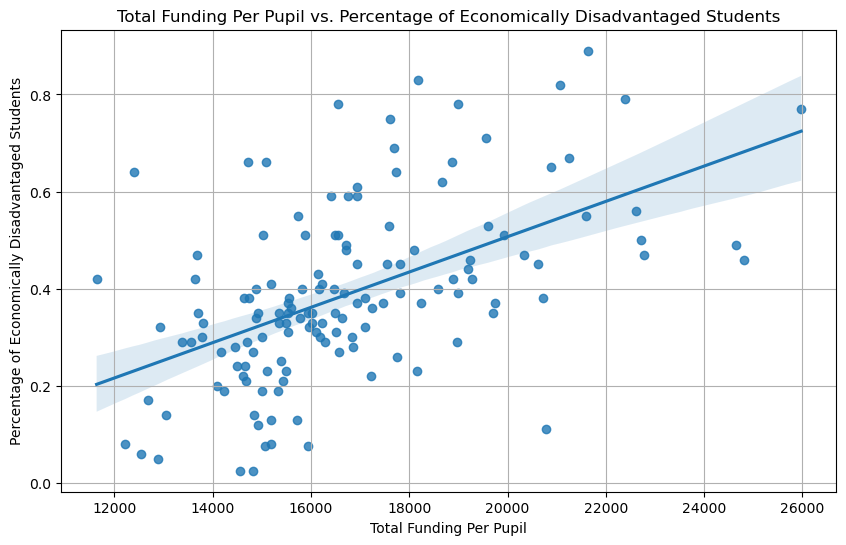

In [30]:
# Scatterplot of Economically Disadvantaged and Total Funding Per Pupil

# Dropping Special Education Schools (lots of funding outliers) and rows with missing values
selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
selected = selected[['Total Funding Per Pupil', 'Economically Disadvantaged']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Total Funding Per Pupil', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
plt.xlabel('Total Funding Per Pupil')
plt.ylabel('Percentage of Economically Disadvantaged Students')
plt.title('Total Funding Per Pupil vs. Percentage of Economically Disadvantaged Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [31]:
# Correlation between Economically Disadvantaged and Total Funding Per Pupil

econ_funding_correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['Total Funding Per Pupil'])
print("Correlation between Economically Disadvantaged Students and funding:")
print(econ_funding_correlations)

Correlation between Economically Disadvantaged Students and funding:
0.5327374525901697


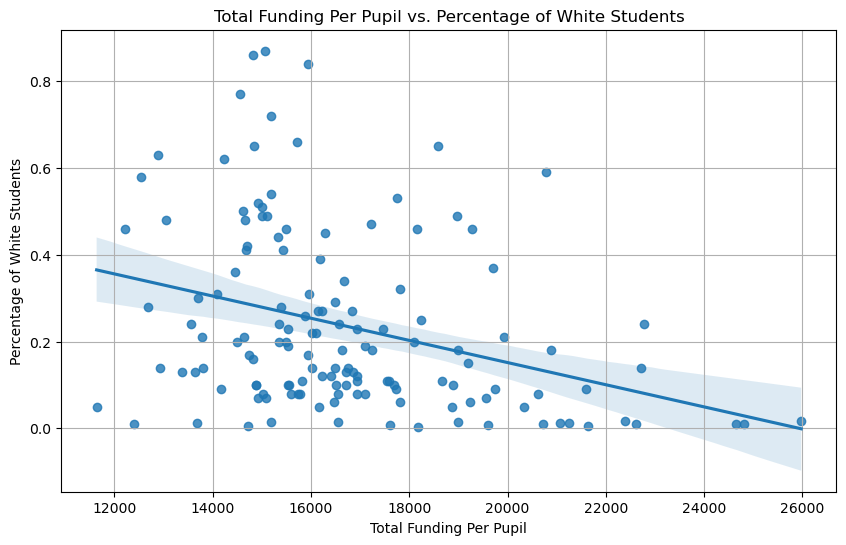

In [32]:
# Scatterplot of % white students and Total Funding Per Pupil

# Dropping Special Education Schools (lots of funding outliers) and rows with missing values
selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
selected = selected[['Total Funding Per Pupil', 'White']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Total Funding Per Pupil', y='White', label='White') # add scatter=False to show only trendlines
    
plt.xlabel('Total Funding Per Pupil')
plt.ylabel('Percentage of White Students')
plt.title('Total Funding Per Pupil vs. Percentage of White Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [33]:
# Correlation between % White and Total Funding Per Pupil

white_funding_correlations = enrollment_academic_resources['White'].corr(enrollment_academic_resources['Total Funding Per Pupil'])
print("Correlation between Percent of White Students and funding:")
print(white_funding_correlations)

Correlation between Percent of White Students and funding:
-0.3284069681645399


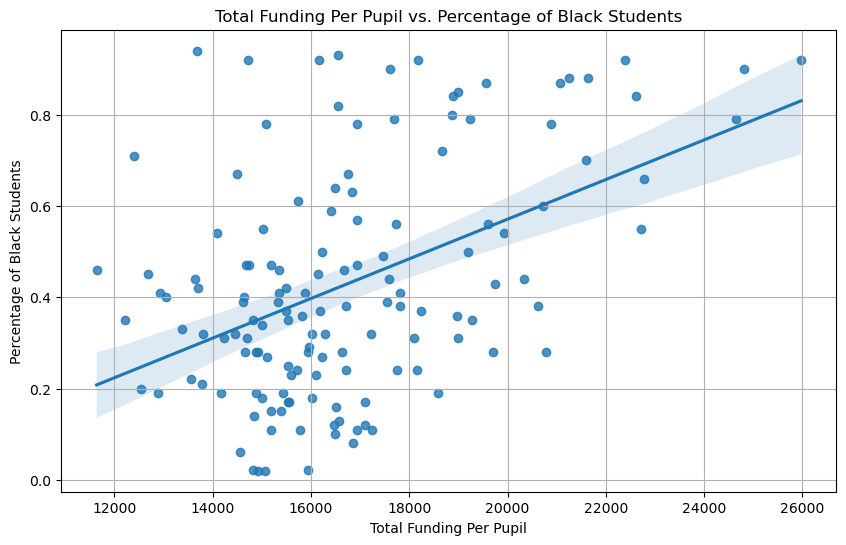

In [34]:
# Scatterplot of % black students and Total Funding Per Pupil

# Dropping Special Education Schools (lots of funding outliers) and rows with missing values
selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
selected = selected[['Total Funding Per Pupil', 'Black or African American']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Total Funding Per Pupil', y='Black or African American', label='Black or African American') # add scatter=False to show only trendlines
    
plt.xlabel('Total Funding Per Pupil')
plt.ylabel('Percentage of Black Students')
plt.title('Total Funding Per Pupil vs. Percentage of Black Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [35]:
# Correlation between % Black and Total Funding Per Pupil

black_funding_correlations = enrollment_academic_resources['Black or African American'].corr(enrollment_academic_resources['Total Funding Per Pupil'])
print("Correlation between Percent of Black Students and funding:")
print(black_funding_correlations)

Correlation between Percent of Black Students and funding:
0.46092048938459984


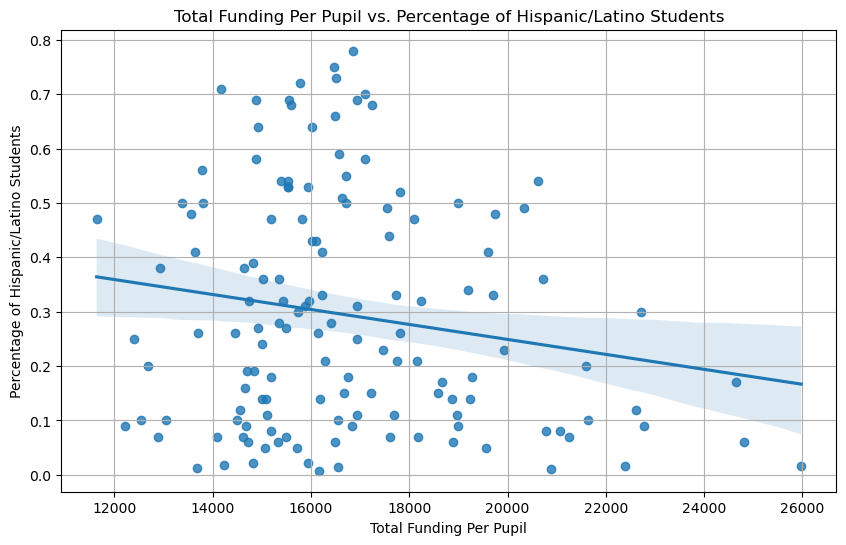

In [36]:
# Scatterplot of % hispanic/latino students and Total Funding Per Pupil

# Dropping Special Education Schools (lots of funding outliers) and rows with missing values
selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
selected = selected[['Total Funding Per Pupil', 'Hispanic/Latino']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Total Funding Per Pupil', y='Hispanic/Latino', label='Hispanic/Latino') # add scatter=False to show only trendlines
    
plt.xlabel('Total Funding Per Pupil')
plt.ylabel('Percentage of Hispanic/Latino Students')
plt.title('Total Funding Per Pupil vs. Percentage of Hispanic/Latino Students')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [37]:
# Correlation between % Hispanic/Latino and Total Funding Per Pupil

latino_funding_correlations = enrollment_academic_resources['Hispanic/Latino'].corr(enrollment_academic_resources['Total Funding Per Pupil'])
print("Correlation between Percent of Hispanic/Latino Students and funding:")
print(latino_funding_correlations)

Correlation between Percent of Hispanic/Latino Students and funding:
-0.1716996491020097


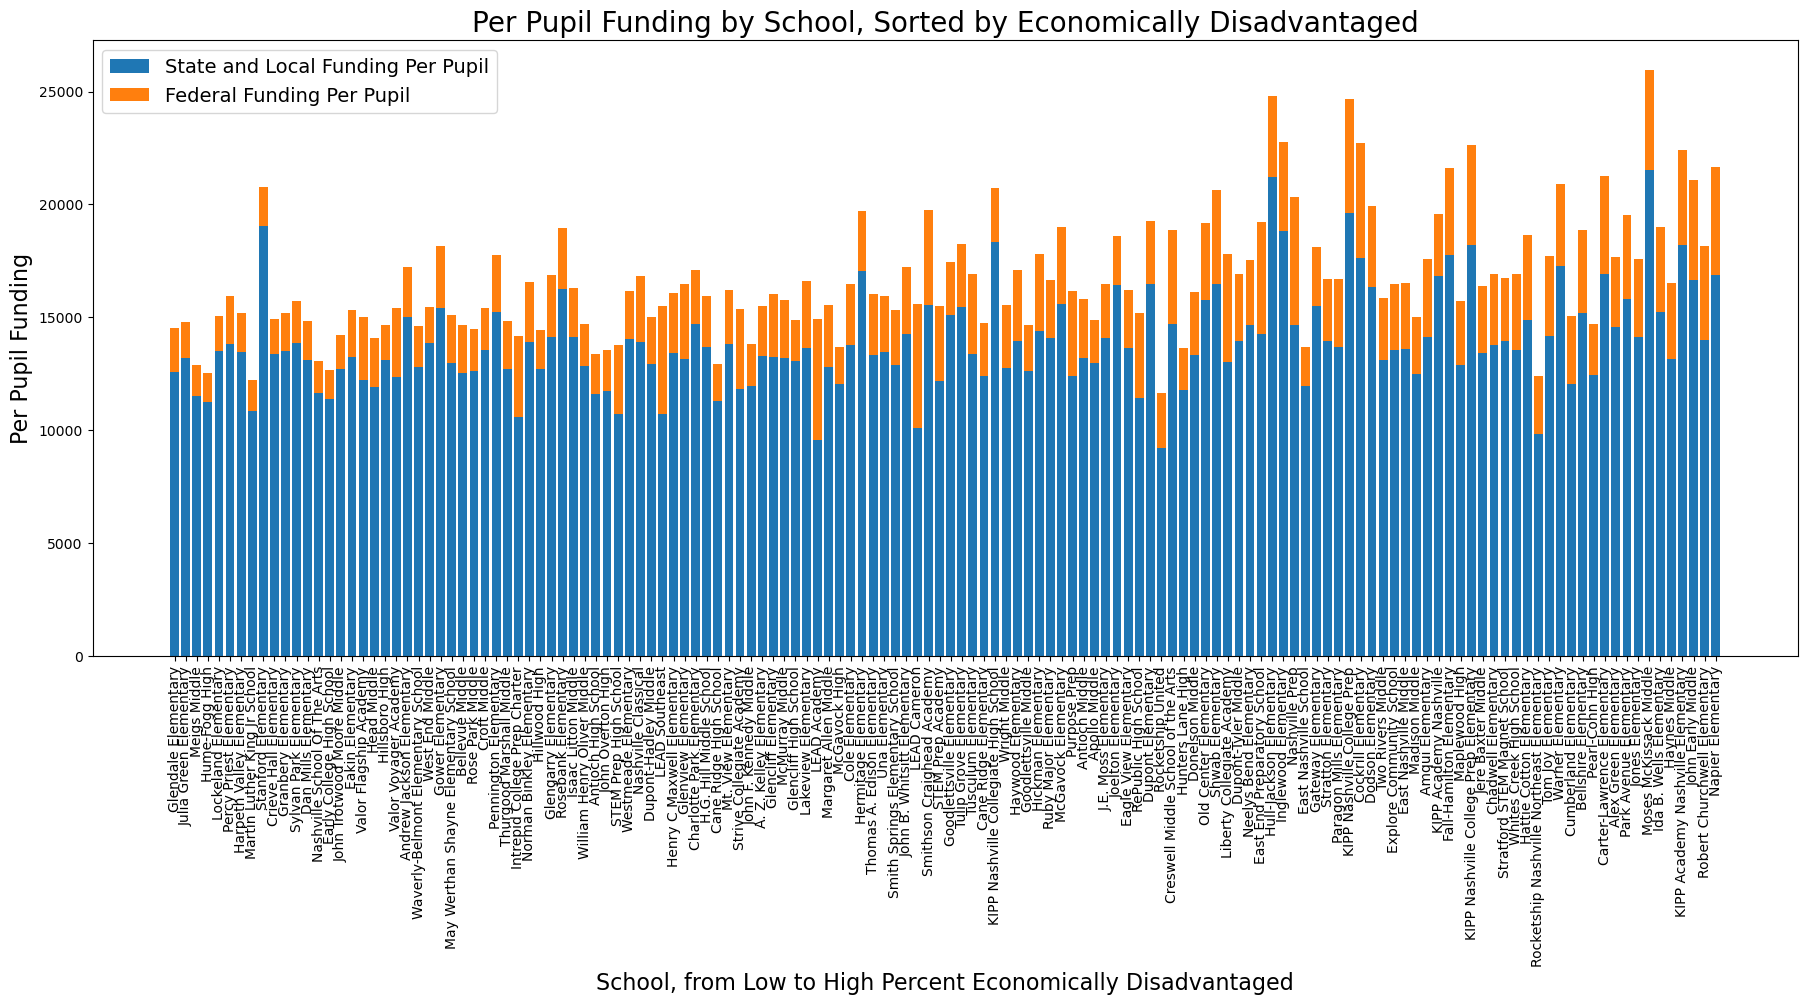

In [38]:
# Sort the DataFrame by 'Economically Disadvantaged' in ascending order
sorted = enrollment_academic_resources.sort_values(by='Economically Disadvantaged')
sorted = sorted[sorted['School Level'] != 'Special Education']
sorted = sorted.dropna(subset=['Federal Per Pupil', 'State and Local Per Pupil'])

# Set the index to 'State School ID' for plotting
sorted.set_index('School Name', inplace=True)

# Create the stacked bar chart
plt.figure(figsize=(22, 8))

# Plot 'State and Local Per Pupil' first
plt.bar(sorted.index, sorted['State and Local Per Pupil'], label='State and Local Funding Per Pupil')

# Plot 'Federal Per Pupil' on top
plt.bar(sorted.index, sorted['Federal Per Pupil'], bottom=sorted['State and Local Per Pupil'], label='Federal Funding Per Pupil')

# Add labels and title
plt.xlabel('School, from Low to High Percent Economically Disadvantaged', fontsize=16)
plt.ylabel('Per Pupil Funding', fontsize=16)
plt.title('Per Pupil Funding by School, Sorted by Economically Disadvantaged', fontsize=20)
plt.legend(fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [39]:
# en_expenditures = expenditures[expenditures['School Name'].isin(['Lockeland Elementary', 'Explore Community School'])]

# # Sort the DataFrame by 'Economically Disadvantaged' in ascending order
# sorted = en_expenditures.sort_values(by='School Name', ascending=False)

# # Set the index to 'State School ID' for plotting
# sorted.set_index('School Name', inplace=True)

# # Create the stacked bar chart
# plt.figure(figsize=(10, 6))

# # Plot 'State and Local Per Pupil' first
# plt.bar(sorted.index, sorted['State and Local Per Pupil'], label='State and Local Funding Per Pupil')

# # Plot 'Federal Per Pupil' on top
# plt.bar(sorted.index, sorted['Federal Per Pupil'], bottom=sorted['State and Local Per Pupil'], label='Federal Funding Per Pupil')

# # Add labels and title
# plt.xlabel('School, from Low to High Percent Economically Disadvantaged')
# plt.ylabel('Per Pupil Funding')
# plt.title('Per Pupil Funding by School, Sorted by Economically Disadvantaged')
# plt.legend()

# # Rotate x-axis labels for better readability
# plt.xticks()

# # Show the plot
# plt.show()

In [40]:
# # Now, accounting for nutrition funding

# expenditures['Total_Minus_Nutrition'] = expenditures['Total Per Pupil'] - expenditures['School Level School Nutrition Per Pupil Expenditures'] - expenditures['District Level School Nutrition Per Pupil Expenditures']

# # Merging to main df
# #expenditures['School ID'] = expenditures['School ID'].astype('int64')
# enrollment_academic_resources = pd.merge(enrollment_and_academic, 
#                                     expenditures[['School ID', 'Total_Minus_Nutrition']], 
#                                     left_on='State School ID', 
#                                     right_on='School ID', 
#                                     how='left')

# #enrollment_academic_resources = enrollment_academic_resources.rename(columns={'Total Per Pupil': 'Total Funding Per Pupil'})

# # Dropping redundant column
# enrollment_academic_resources = enrollment_academic_resources.drop(columns=['School ID_y'])

# # Sort the DataFrame by 'Economically Disadvantaged' in ascending order
# sorted = enrollment_academic_resources.sort_values(by='Economically Disadvantaged')
# sorted = sorted.dropna(subset=['Total_Minus_Nutrition'])

# # Set the index to 'State School ID' for plotting
# sorted.set_index('School Name', inplace=True)

# # Create the stacked bar chart
# plt.figure(figsize=(22, 8))

# # Plot 'State and Local Per Pupil' first
# plt.bar(sorted.index, sorted['Total_Minus_Nutrition'], label='Per Pupil Funding, Minus Nutrition Funding')

# # Plot 'Federal Per Pupil' on top
# #plt.bar(sorted.index, sorted['Federal Per Pupil'], bottom=sorted['State and Local Per Pupil'], label='Federal Funding Per Pupil')

# # Add labels and title
# plt.xlabel('School, from Low to High Percent Economically Disadvantaged', fontsize=16)
# plt.ylabel('Per Pupil Funding, Minus Nutrition Funding', fontsize=16)
# plt.title('Per Pupil Funding by School, Minus Nutrition Funding, Sorted by Economically Disadvantaged', fontsize=20)
# plt.legend(fontsize=14)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()

In [41]:
# # Scatterplot of Economically Disadvantaged and Total Funding Per Pupil

# # Dropping Special Education Schools (lots of funding outliers) and rows with missing values
# selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
# selected = selected[['Total_Minus_Nutrition', 'Economically Disadvantaged']].dropna()

# # Scatterplot with trendlines
# plt.figure(figsize=(10, 6))
# sns.regplot(data=selected, x='Total_Minus_Nutrition', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
# plt.xlabel('Total Funding Per Pupil, Minus Nutrition Funding')
# plt.ylabel('Percentage of Economically Disadvantaged Students')
# plt.title('Total Funding Per Pupil, Minus Nutrition Funding vs. Percentage of Economically Disadvantaged Students')
# #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

In [42]:
# # Correlation between Economically Disadvantaged and Funding Per Pupil Minus Nutrition

# econ_funding_no_nutrition_correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['Total_Minus_Nutrition'])
# print("Correlation between Economically Disadvantaged Students and funding:")
# print(econ_funding_no_nutrition_correlations)

In [43]:
# Investigate schools with high and low funding
# enrollment_academic_resources.sort_values('Total Funding Per Pupil')

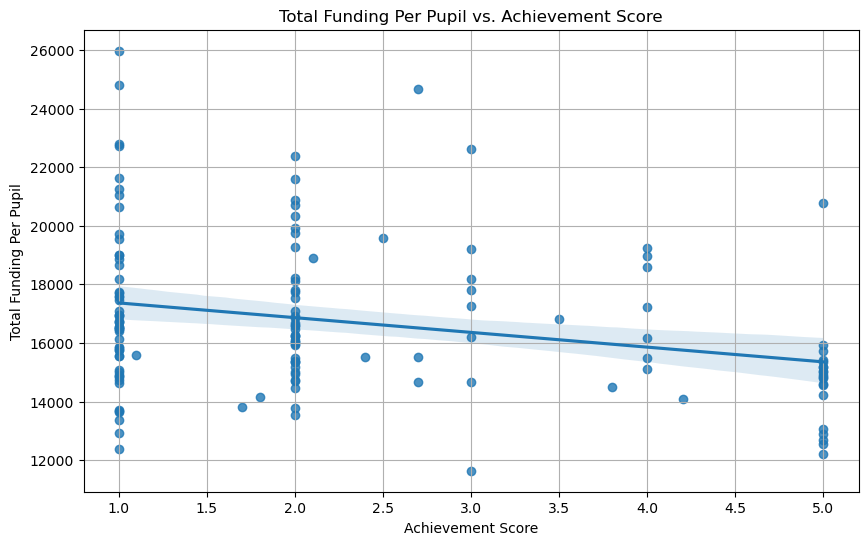

In [59]:
# Scatterplot of funding vs academics

# Dropping Special Education Schools (lots of funding outliers) and rows with missing values
selected = enrollment_academic_resources[enrollment_academic_resources['School Level'] != 'Special Education']
selected = selected[['Total Funding Per Pupil', 'ach_score']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='ach_score', y='Total Funding Per Pupil', label='Per Pupil Funding') # add scatter=False to show only trendlines
    
plt.xlabel('Achievement Score')
plt.ylabel('Total Funding Per Pupil')
plt.title('Total Funding Per Pupil vs. Achievement Score')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [45]:
# Correlation between Achievement Score and Total Funding Per Pupil

ach_funding_correlations = enrollment_academic_resources['ach_score'].corr(enrollment_academic_resources['Total Funding Per Pupil'])
print("Correlation between achievement score and funding:")
print(ach_funding_correlations)

Correlation between achievement score and funding:
-0.26542935296303943


In [76]:
# Correlation between ED and State Funding Per Pupil

correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['State and Local Per Pupil'])
print("Correlation:")
print(correlations)

Correlation:
0.37628152213556326


In [77]:
# Correlation between ED and Federal Funding Per Pupil

correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['Federal Per Pupil'])
print("Correlation:")
print(correlations)

Correlation:
0.6239636447395163


In [75]:
enrollment_academic_resources

,School Year,School Level,School ID_x,School Name,State School ID,Zip Code,Total Enrollment,Grade PreK 3yrs,Grade PreK 4yrs,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,American Indian or Alaska Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,White,Male,Female,Economically Disadvantaged,Students with Disabilities,Limited English Proficiency,DataAsOf,American Indian or Alaska Native Count,Asian Count,Black or African American Count,Hispanic/Latino Count,Native Hawaiian or Other Pacific Islander Count,White Count,Male Count,Female Count,Economically Disadvantaged Count,Students with Disabilities Count,Limited English Proficiency Count,ach_score,lg_score,lg_grade,Total Funding Per Pupil,Federal Per Pupil,State and Local Per Pupil,Percentage Experienced Teachers,Student-Educator Ratio
0,22-23,Elementary School,496,A. Z. Kelley Elementary,1,37013,707,NaN,6%,18%,19%,20%,18%,21%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,0.150000,0.37,0.27,0.005000,0.20,0.53,0.47,0.33,0.11,0.440,01/17/2023,3.535000,106.050000,261.59,190.89,3.535000,141.40,374.71,332.29,233.31,77.77,311.080,2.0,3.3,C,15488.45,2209.14,13279.31,0.8889,12.0
1,22-23,Elementary School,375,Alex Green Elementary,5,37189,439,< 10,7%,18%,17%,13%,14%,17%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.79,0.11,0.000000,0.10,0.51,0.49,0.69,0.11,0.170,01/17/2023,0.000000,0.000000,346.81,48.29,0.000000,43.90,223.89,215.11,302.91,48.29,74.630,1.0,2.1,D,17694.17,3115.04,14579.13,0.8438,12.0
2,22-23,Elementary School,105,Amqui Elementary,10,37115,514,< 10,6%,15%,18%,19%,14%,15%,12%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003333,0.003333,0.44,0.44,0.003333,0.11,0.49,0.51,0.53,0.10,0.330,01/17/2023,1.713333,1.713333,226.16,226.16,1.713333,56.54,251.86,262.14,272.42,51.40,169.620,1.0,2.4,D,17578.64,3442.01,14136.63,0.6667,11.0
3,22-23,Elementary School,460,Andrew Jackson Elementary,15,37138,473,< 10,7%,19%,18%,13%,16%,13%,14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.020000,0.32,0.15,0.020000,0.47,0.56,0.44,0.22,0.16,0.090,01/17/2023,9.460000,9.460000,151.36,70.95,9.460000,222.31,264.88,208.12,104.06,75.68,42.570,4.0,3.5,B,17212.39,2190.39,15022.00,0.9737,12.0
4,22-23,High School,110,Antioch High School,20,37013,2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 10,28%,27%,27%,18%,0.013333,0.013333,0.33,0.50,0.013333,0.13,0.52,0.48,0.29,0.11,0.370,01/17/2023,28.386667,28.386667,702.57,1064.50,28.386667,276.77,1107.08,1021.92,617.41,234.19,787.730,1.0,1.1,F,13364.80,1739.97,11624.83,0.7879,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22-23,Middle School,770,West End Middle,690,37205,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37%,33%,30%,NaN,NaN,NaN,NaN,0.016667,0.016667,0.42,0.07,0.016667,0.46,0.53,0.47,0.23,0.22,0.025,01/17/2023,5.750000,5.750000,144.90,24.15,5.750000,158.70,182.85,162.15,79.35,75.90,8.625,4.0,3.4,C,15482.25,1604.63,13877.62,0.8400,14.0
140,22-23,Elementary School,775,Westmeade Elementary,695,37205,375,NaN,NaN,21%,21%,19%,18%,21%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000,0.37,0.14,0.000000,0.39,0.53,0.47,0.30,0.13,0.140,01/17/2023,0.000000,37.500000,138.75,52.50,0.000000,146.25,198.75,176.25,112.50,48.75,52.500,3.0,3.9,B,16188.56,2165.25,14023.31,0.7576,11.0
141,22-23,High School,787,Whites Creek High School,704,37189,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29%,28%,25%,18%,0.000000,0.000000,0.78,0.11,0.000000,0.11,0.54,0.46,0.61,0.18,0.090,01/17/2023,0.000000,0.000000,469.56,66.22,0.000000,66.22,325.08,276.92,367.22,108.36,54.180,1.0,2.6,C,16928.72,3382.32,13546.40,0.7619,14.0
142,22-23,Middle School,612,William Henry Oliver Middle,538,37211,680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20%,24%,26%,30%,NaN,NaN,NaN,NaN,0.000000,0.080000,0.31,0.19,0.000000,0.42,0.52,0.48,0.29,0.13,0.250,01/17/2023,0.000000,

## Experienced Teachers

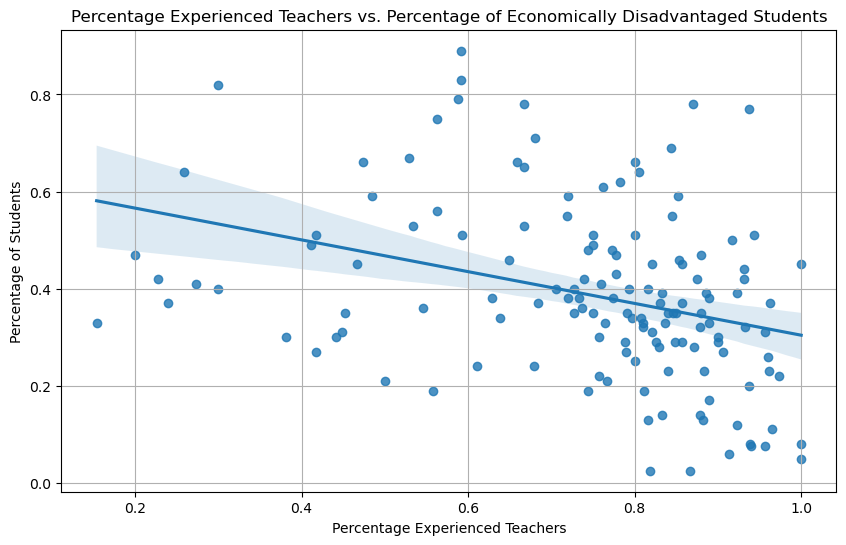

In [46]:
# Scatterplot of Economically Disadvantaged and % Experienced Teachers

selected = enrollment_academic_resources[['Percentage Experienced Teachers', 'Economically Disadvantaged']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Percentage Experienced Teachers', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
plt.xlabel('Percentage Experienced Teachers')
plt.ylabel('Percentage of Students')
plt.title('Percentage Experienced Teachers vs. Percentage of Economically Disadvantaged Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [47]:
# Correlation between Economically Disadvantaged and % Experienced Teachers

xp_econ_correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['Percentage Experienced Teachers'])
print("Correlation between Economically Disadvantaged Students and Percentage Experienced Teachers:")
print(xp_econ_correlations)

Correlation between Economically Disadvantaged Students and Percentage Experienced Teachers:
-0.34129380908651913


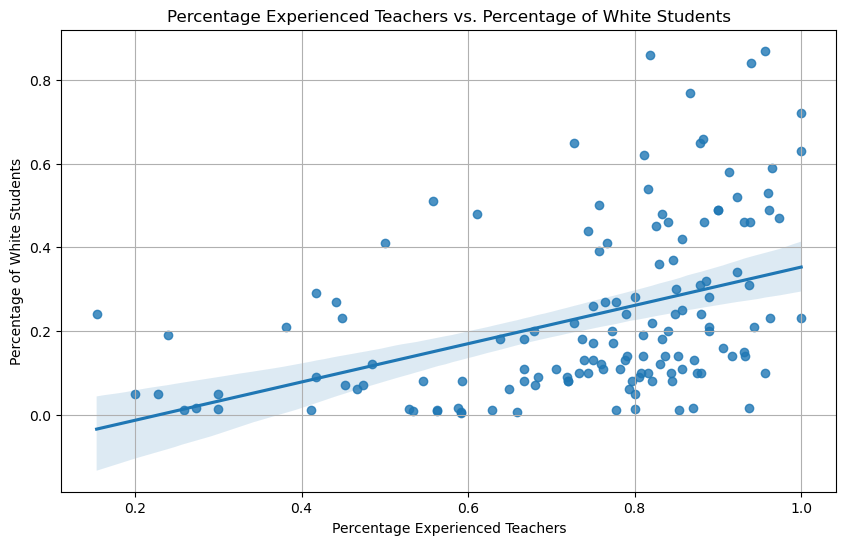

In [64]:
# Scatterplot of % white students and % Experienced Teachers

selected = enrollment_academic_resources[['Percentage Experienced Teachers', 'White']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Percentage Experienced Teachers', y='White', label='White') # add scatter=False to show only trendlines
    
plt.xlabel('Percentage Experienced Teachers')
plt.ylabel('Percentage of White Students')
plt.title('Percentage Experienced Teachers vs. Percentage of White Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [49]:
# Correlation between % White Students and % Experienced Teachers

xp_white_correlations = enrollment_academic_resources['White'].corr(enrollment_academic_resources['Percentage Experienced Teachers'])
print("Correlation between Percentage White Students and Percentage Experienced Teachers:")
print(xp_white_correlations)

Correlation between Percentage White Students and Percentage Experienced Teachers:
0.4194436166525963


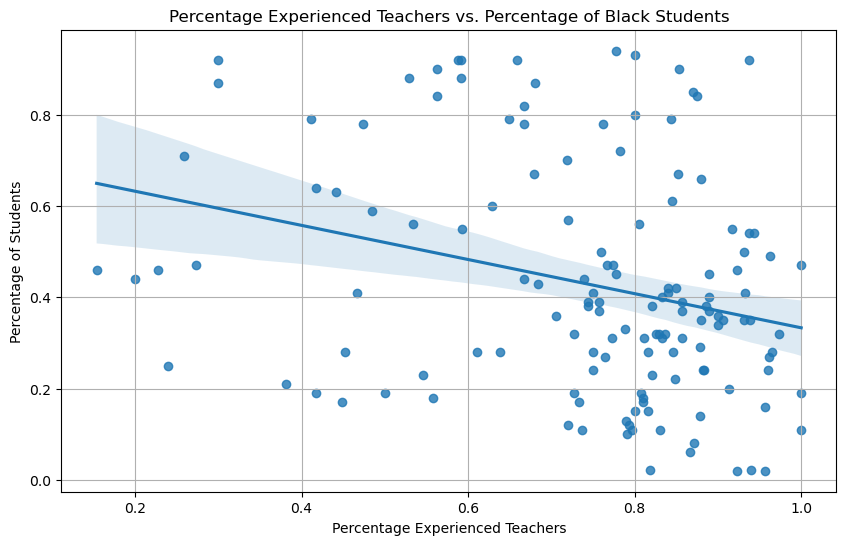

In [61]:
# Scatterplot of % black students and % Experienced Teachers

selected = enrollment_academic_resources[['Percentage Experienced Teachers', 'Black or African American']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Percentage Experienced Teachers', y='Black or African American', label='Black or African American') # add scatter=False to show only trendlines
    
plt.xlabel('Percentage Experienced Teachers')
plt.ylabel('Percentage of Students')
plt.title('Percentage Experienced Teachers vs. Percentage of Black Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [51]:
# Correlation between % Black Students and % Experienced Teachers

xp_black_correlations = enrollment_academic_resources['Black or African American'].corr(enrollment_academic_resources['Percentage Experienced Teachers'])
print("Correlation between Percentage Black Students and Percentage Experienced Teachers:")
print(xp_black_correlations)

Correlation between Percentage Black Students and Percentage Experienced Teachers:
-0.2826973369289535


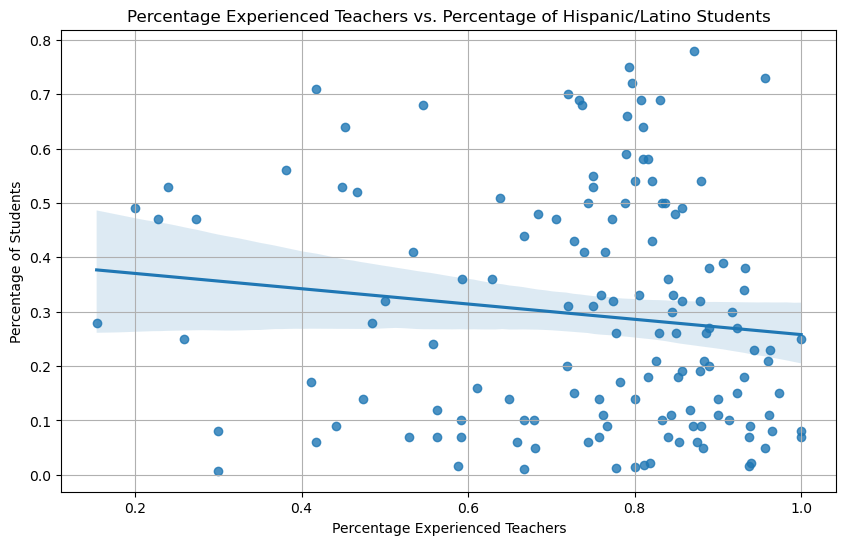

In [62]:
# Scatterplot of % hispanic/latino students and % Experienced Teachers

selected = enrollment_academic_resources[['Percentage Experienced Teachers', 'Hispanic/Latino']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Percentage Experienced Teachers', y='Hispanic/Latino', label='Hispanic/Latino') # add scatter=False to show only trendlines
    
plt.xlabel('Percentage Experienced Teachers')
plt.ylabel('Percentage of Students')
plt.title('Percentage Experienced Teachers vs. Percentage of Hispanic/Latino Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [63]:
# Correlation between % White Students and % Experienced Teachers

xp_latino_correlations = enrollment_academic_resources['Hispanic/Latino'].corr(enrollment_academic_resources['Percentage Experienced Teachers'])
print("Correlation between Percentage Hispanic/Latino Students and Percentage Experienced Teachers:")
print(xp_latino_correlations)

Correlation between Percentage Hispanic/Latino Students and Percentage Experienced Teachers:
-0.12492740435011199


## Student Teacher Ratio

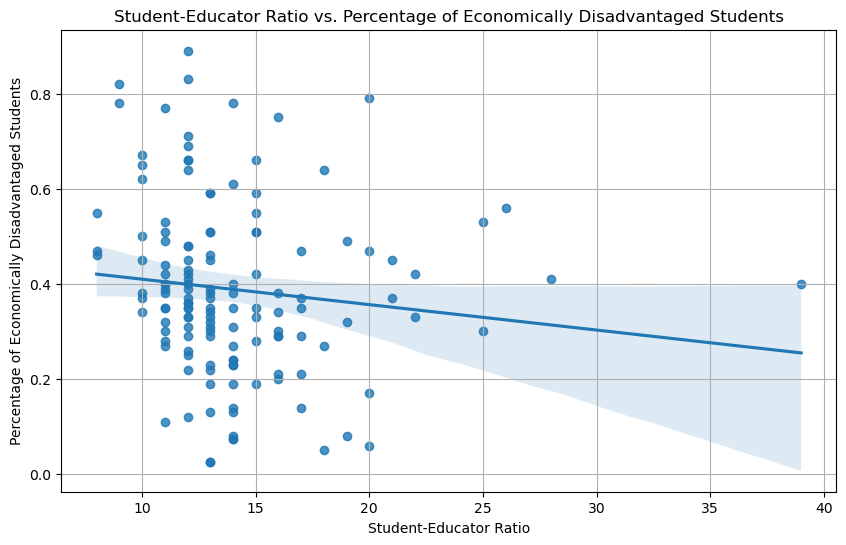

In [65]:
# Scatterplot of Economically Disadvantaged and Student Teacher Ratio

selected = enrollment_academic_resources[~enrollment_academic_resources['School Level'].isin(['Non-Traditional - Hybrid', 'Non-Traditional', 'Adult', 'Alternative Learning Center', 'Special Education'])]
selected = selected[['Student-Educator Ratio', 'Economically Disadvantaged']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Student-Educator Ratio', y='Economically Disadvantaged', label='Economically Disadvantaged') # add scatter=False to show only trendlines
    
plt.xlabel('Student-Educator Ratio')
plt.ylabel('Percentage of Economically Disadvantaged Students')
plt.title('Student-Educator Ratio vs. Percentage of Economically Disadvantaged Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [53]:
# Correlation between Economically Disadvantaged and Student Teacher Ratio

ratio_econ_correlations = enrollment_academic_resources['Economically Disadvantaged'].corr(enrollment_academic_resources['Student-Educator Ratio'])
print("Correlation between Economically Disadvantaged Students and Student-Educator Ratio:")
print(ratio_econ_correlations)

Correlation between Economically Disadvantaged Students and Student-Educator Ratio:
-0.12167070733301844


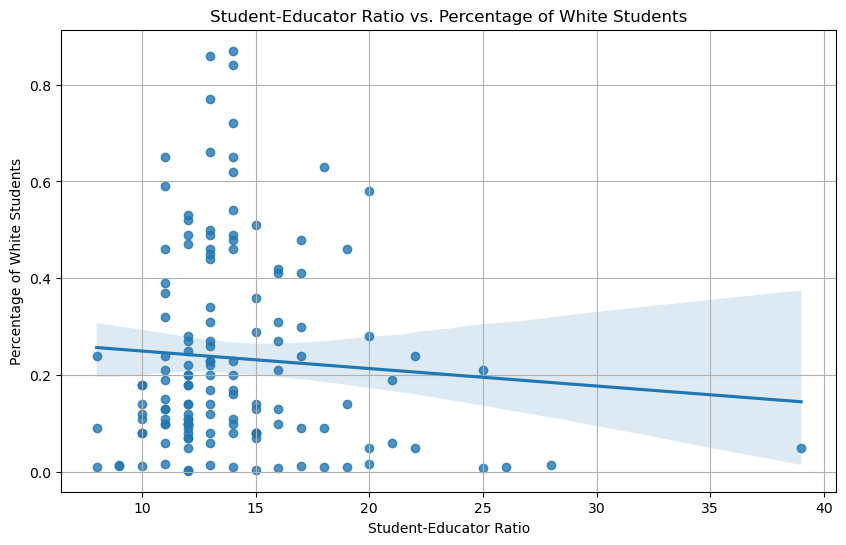

In [66]:
# Scatterplot of % White and Student Teacher Ratio

selected = enrollment_academic_resources[~enrollment_academic_resources['School Level'].isin(['Non-Traditional - Hybrid', 'Non-Traditional', 'Adult', 'Alternative Learning Center', 'Special Education'])]
selected = selected[['Student-Educator Ratio', 'White']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Student-Educator Ratio', y='White', label='Percentage White Students') # add scatter=False to show only trendlines
    
plt.xlabel('Student-Educator Ratio')
plt.ylabel('Percentage of White Students')
plt.title('Student-Educator Ratio vs. Percentage of White Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [55]:
# Correlation between % White and Student Teacher Ratio

ratio_white_correlations = enrollment_academic_resources['White'].corr(enrollment_academic_resources['Student-Educator Ratio'])
print("Correlation between % White Students and Student-Educator Ratio:")
print(ratio_white_correlations)

Correlation between % White Students and Student-Educator Ratio:
-0.07223153629054117


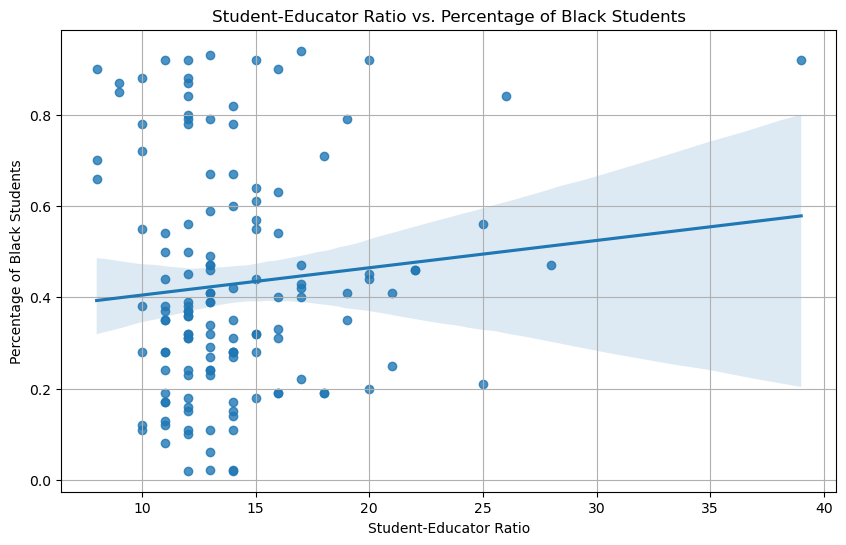

In [67]:
# Scatterplot of % Black and Student Teacher Ratio

selected = enrollment_academic_resources[~enrollment_academic_resources['School Level'].isin(['Non-Traditional - Hybrid', 'Non-Traditional', 'Adult', 'Alternative Learning Center', 'Special Education'])]
selected = selected[['Student-Educator Ratio', 'Black or African American']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Student-Educator Ratio', y='Black or African American', label='Percentage Black Students') # add scatter=False to show only trendlines
    
plt.xlabel('Student-Educator Ratio')
plt.ylabel('Percentage of Black Students')
plt.title('Student-Educator Ratio vs. Percentage of Black Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [57]:
# Correlation between % Black and Student Teacher Ratio

ratio_black_correlations = enrollment_academic_resources['Black or African American'].corr(enrollment_academic_resources['Student-Educator Ratio'])
print("Correlation between % Black Students and Student-Educator Ratio:")
print(ratio_black_correlations)

Correlation between % Black Students and Student-Educator Ratio:
0.09871909501336842


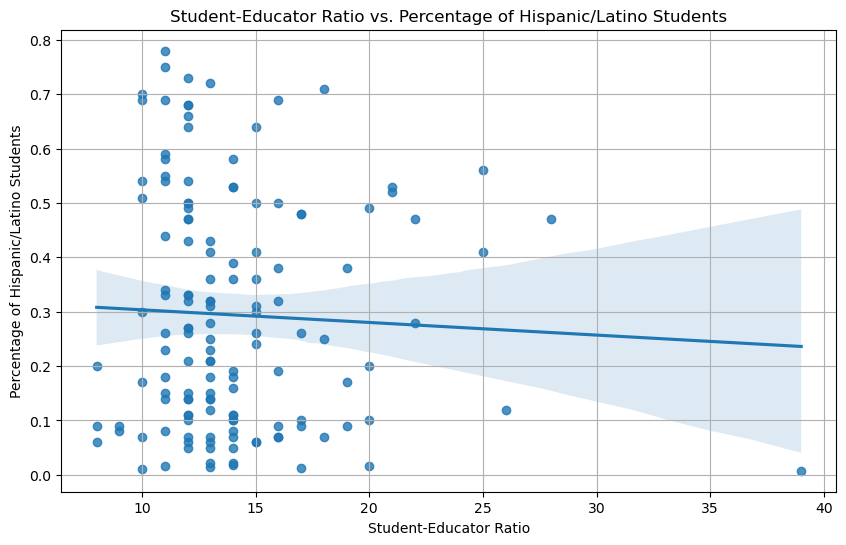

In [68]:
# Scatterplot of % Hispanic/Latino and Student Teacher Ratio

selected = enrollment_academic_resources[~enrollment_academic_resources['School Level'].isin(['Non-Traditional - Hybrid', 'Non-Traditional', 'Adult', 'Alternative Learning Center', 'Special Education'])]
selected = selected[['Student-Educator Ratio', 'Hispanic/Latino']].dropna()

# Scatterplot with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=selected, x='Student-Educator Ratio', y='Hispanic/Latino', label='Percentage Hispanic/Latino Students') # add scatter=False to show only trendlines
    
plt.xlabel('Student-Educator Ratio')
plt.ylabel('Percentage of Hispanic/Latino Students')
plt.title('Student-Educator Ratio vs. Percentage of Hispanic/Latino Students')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [71]:
# Correlation between % Hispanic/Latino and Student Teacher Ratio

ratio_latino_correlations = enrollment_academic_resources['Hispanic/Latino'].corr(enrollment_academic_resources['Student-Educator Ratio'])
print("Correlation between % Hispanic/Latino Students and Student-Educator Ratio:")
print(ratio_latino_correlations)

Correlation between % Hispanic/Latino Students and Student-Educator Ratio:
-0.045045734899530905


# Dashboard Prep

In [58]:
# Preparing and exporting a csv file for dashboarding

# Importing school directory to get addresses
directory = pd.read_excel("../data/schl_directory_2017-18.xlsx")

# Filtering for MNPS schools
directory = directory[directory['LEA_NAME']=='Metro Nashville Public Schools']

# Merging enrollment_academic_resources and directory, to add addresses to the main dataframe
mnps = pd.merge(enrollment_academic_resources, directory[['SCHOOL_NO', 'ADDRESS', 'CITY', 'STATE', 'ZIP']], 
                left_on='State School ID', right_on='SCHOOL_NO', how='left')

# Dropping 'school' column
mnps = mnps.drop(columns=['SCHOOL_NO'])

# Saving as csv
mnps.to_csv('../data/mnps.csv', index=False)


# TO DO
Look more into source of funding, and at funding outliers
Update filtering on school types, since did it for entire df can remove it from code


In [72]:
expenditures

,Key,Dist,District ID,District Name,School ID,School Name,Enrollment,Federal Per Pupil,State and Local Per Pupil,Total Per Pupil,School Level Federal Per Pupil Expenditures,School Level State and Local Per Pupil Expenditures,School Level School Nutrition Per Pupil Expenditures,Total School Level Per Pupil Expenditures,Distrist Level Federal Per Pupil Expenditures,District Level State and Local Per Pupil Expenditures,District Level School Nutrition Per Pupil Expenditures,Total District Level Per Pupil Expenditures,Total School Per Pupil Expenditures,Total Expenditures Per School,Local Percentage,Federal Percentage,State Percentage,Unnamed: 23,Total Federal Salaries & Benefits,Federal Salaries & Benefits Per Pupil,Total Federal Non-personnel,Federal Non-personnel Per Pupil,Total State/Local Salaries & Benefits,State/Local Salaries & benefits Per Pupil,Total State/Local Non-personnel,State/Local Non-personnel Per Pupil
34,190 9999,190.0,190.0,Davidson County,9999,District Average/Total,77109.0,2629.86,13303.59,15933.45,998.89,8623.38,629.86,10252.13,876.12,4680.21,124.99,5681.32,15933.45,15933.45,0.149529,0.264986,0.585485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,190 0001,190.0,190.0,Davidson County,1,A. Z. Kelley Elementary,702.0,2209.14,13279.31,15488.45,422.68,8599.10,785.35,9807.14,876.12,4680.21,124.99,5681.32,15488.46,10872898.92,NaN,NaN,NaN,NaN,266515,379.650997,30209.0,43.032764,5836849.0,8314.599715,199720.0,284.501425
391,190 0003,190.0,190.0,Davidson County,3,MNPS Virtual School,290.0,7312.89,8501.01,15813.90,6311.78,3820.80,0.00,10132.58,876.12,4680.21,124.99,5681.32,15813.90,4586031.00,NaN,NaN,NaN,NaN,1723345,5942.568966,107071.0,369.210345,1053336.0,3632.193103,54697.0,188.610345
392,190 0005,190.0,190.0,Davidson County,5,Alex Green Elementary,353.0,3115.04,14579.13,17694.17,781.97,9898.92,1331.96,12012.85,876.12,4680.21,124.99,5681.32,17694.17,6246042.01,NaN,NaN,NaN,NaN,248522,704.028329,15792.0,44.736544,3343696.0,9472.226629,150621.0,426.688385
393,190 0010,190.0,190.0,Davidson County,10,Amqui Elementary,397.0,3442.01,14136.63,17578.64,1252.16,9456.42,1188.74,11897.32,876.12,4680.21,124.99,5681.32,17578.64,6978720.08,NaN,NaN,NaN,NaN,457899,1153.397985,15568.0,39.214106,3596510.0,9059.219144,157690.0,397.204030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,190 8085,190.0,190.0,Davidson County,8085,KIPP Nashville College Prep Elementary,414.0,4395.12,18217.23,22612.35,2464.97,13537.02,929.04,16931.03,876.12,4680.21,124.99,5681.32,22612.35,9361512.90,NaN,NaN,NaN,NaN,1020499,2464.973430,0.0,0.000000,5457160.0,13181.545894,147168.0,355.478261
537,190 8090,190.0,190.0,Davidson County,8090,Strive Collegiate Academy,336.0,3524.43,11830.70,15355.13,2106.59,7150.49,416.73,9673.81,876.12,4680.21,124.99,5681.32,15355.13,5159323.68,NaN,NaN,NaN,NaN,707815,2106.592262,0.0,0.000000,2299171.0,6842.770833,103394.0,307.720238
538,190 8095,190.0,190.0,Davidson County,8095,KIPP Academy Nashville Elementary School,371.0,4172.08,18221.87,22393.95,2434.54,13541.66,736.43,16712.63,876.12,4680.21,124.99,5681.32,22393.95,8308155.45,NaN,NaN,NaN,NaN,759014,2045.859838,144200.0,388.679245,4922875.0,13269.204852,101081.0,272.455526
539,190 8100,190.0,190.0,Davidson County,8100,RePublic High School,656.0,3757.91,11422.96,15180.87,2318.80,6742.75,438.00,9499.55,876.12,4680.21,124.99,5681.32,15180.87,9958650.72,NaN,NaN,NaN,NaN,1512091,2305.016768,9044.0,13.786585,2663903.0,4060.827744,1759344.0,2681.926829
